# Import libraries and data


In [1]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python


In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#get the data
data = pd.read_csv("Daily Bike Sharing.csv", 
                   index_col = "dteday", 
                   parse_dates = True)
data.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [4]:
#select variables
dataset = data.cnt.rename("y")
dataset.head(1)                       

dteday
2011-01-01    985
Name: y, dtype: int64

#Data Transformation

In [5]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

#Visualization

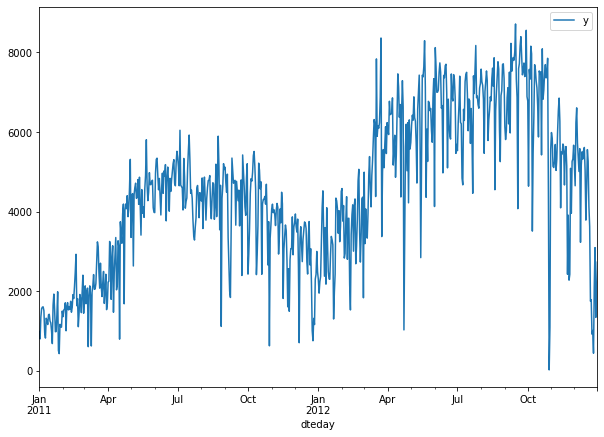

In [7]:
#viz
dataset.plot(figsize = (10, 7), legend = True)

#Training and Test Set

In [9]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days]
test_set = dataset.iloc[-test_days:]
test_set.tail(1)

dteday
2012-12-31    2729
Freq: D, Name: y, dtype: int64

#load predictions

In [10]:
#change directory
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble


In [12]:
#load predictions
hw = pd.read_csv("predictions_hw.csv", index_col= [0], parse_dates=True)
tbats = pd.read_csv("predictions_tbats.csv", index_col= [0], parse_dates=True)
sarimax = pd.read_csv("predictions_sarimax.csv", index_col= [0], parse_dates=True)
tfp = pd.read_csv("predictions_tfp.csv", index_col= [0], parse_dates=True)
prophet_tuned = pd.read_csv("predictions_prophet_tuned.csv", index_col= [0], parse_dates=True)
xgboost = pd.read_csv("predictions_xgb.csv", index_col= [0], parse_dates=True)

In [13]:
#concatenate predictions
df = pd.concat([test_set,hw, tbats, sarimax, tfp, prophet_tuned, xgboost], axis = 1)
df.head()

,y,HW,TBATS,SARIMAX,TFP,prophet_tuned,XGBoost
2012-12-01,5191,4834.729863,4828.272249,4288.869860,4708.606424,4123.671979,4020.1626
2012-12-02,4649,4433.017007,4482.064414,4216.860537,3890.568826,3497.119336,3019.3010
2012-12-03,6234,4465.567184,4362.513961,5448.132504,4321.414610,5626.701226,6139.2030
2012-12-04,6606,4626.723243,4305.123489,5427.384612,4301.598519,5608.114449,6325.9893
2012-12-05,5729,4743.843081,4260.338328,5448.691488,4732.765241,5319.873924,5994.2570


#Ensemble forecast

In [15]:
df["ensemble"] = df.iloc[:,1:].mean(axis = 1)
df.head()

,y,HW,TBATS,SARIMAX,TFP,prophet_tuned,XGBoost,ensemble
2012-12-01,5191,4834.729863,4828.272249,4288.869860,4708.606424,4123.671979,4020.1626,4467.385496
2012-12-02,4649,4433.017007,4482.064414,4216.860537,3890.568826,3497.119336,3019.3010,3923.155187
2012-12-03,6234,4465.567184,4362.513961,5448.132504,4321.414610,5626.701226,6139.2030,5060.588747
2012-12-04,6606,4626.723243,4305.123489,5427.384612,4301.598519,5608.114449,6325.9893,5099.155602
2012-12-05,5729,4743.843081,4260.338328,5448.691488,4732.765241,5319.873924,5994.2570,5083.294844


#Viz

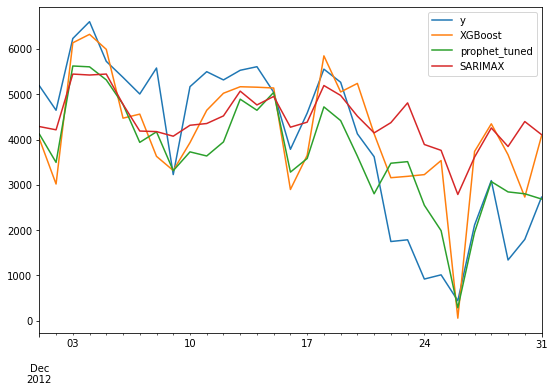

In [17]:
#visualization
df.y.plot(figsize = (9,6), legend = True)
df.XGBoost.plot(legend  = True)
df.prophet_tuned.plot(legend = True)
df.SARIMAX.plot(legend = True)

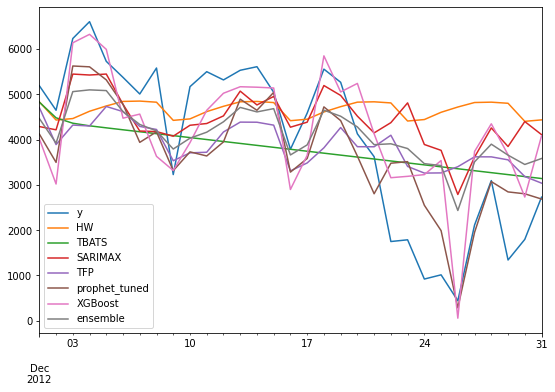

In [18]:
df.plot(figsize = (9,6), legend = True)

#Model assessment

In [19]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(df.y, df.ensemble),0))
print(round(np.sqrt(mean_squared_error(df.y, df.ensemble)), 0))

1122.0
1302.0


In [20]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(df.y, df.ensemble)

61.543353220275264